In [7]:
import sys
import os
sys.path.append('/home/tpopova/prj/polymer_brush')


from py_utils.annealing_brush import annealing_anion
from py_utils.quenched_brush import quecnhed_br

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform
from matplotlib.text import Annotation
class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

In [8]:
#ПАРАМЕТРЫ
N = 400
S = 100
Cs = 0.001

pK_brush = 5
pK_minus = 5
pK_plus = 9
# f_plus = 0.4778
f_plus = 0.334


dpk = 1, pH = 9.999000099990002e-05, alpha  = 0.09090909090909091
dpk = 0.8, pH = 6.309175362748656e-05, alpha  = 0.13680688860321
dpk = 0.6, pH = 3.9809132225250454e-05, alpha  = 0.20076000891310175
dpk = 0.4, pH = 2.5118233373599877e-05, alpha  = 0.2847472489508014
dpk = 0, pH = 9.99990000099999e-06, alpha  = 0.5
dpk = -0.4, pH = 3.9810558566661404e-06, alpha  = 0.7152527510491987


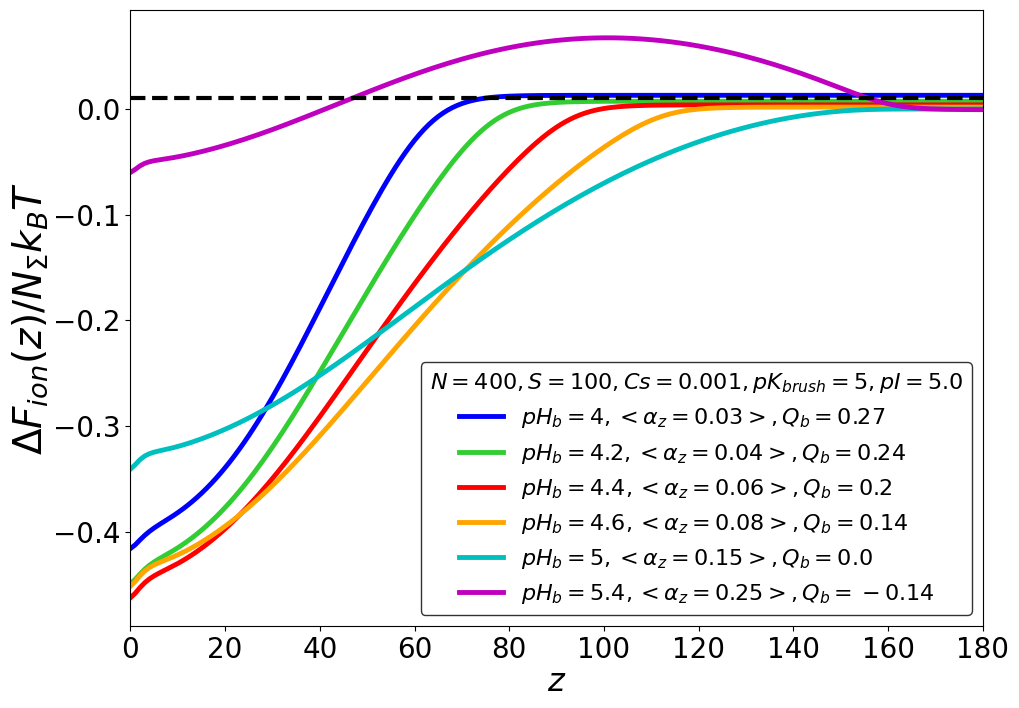

In [9]:
delta_pK_brush = [1, 0.8, 0.6, 0.4, 0, -0.4]
colors = ['blue', 'limegreen', 'red', 'orange', 'c', 'm', 'm']
files_anneal_pH = ['a_dpk_1.pro','a_dpk_0.8.pro', 'a_dpk_0.6.pro','a_dpk_0.4.pro','a_dpk_0.pro', 'a_dpk_-0.4.pro']
files_quenc_pH = ['q_dpk_1.pro','q_dpk_0.8.pro', 'q_dpk_0.6.pro','q_dpk_0.4.pro','q_dpk_0.pro', 'q_dpk_-0.4.pro']

fig, ax = plt.subplots()

for delt_pK, anneal, quen, color in zip(delta_pK_brush, files_anneal_pH, files_quenc_pH, colors):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi, tild_Q  = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = delt_pK, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = anneal, 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/F_lower_pK/')
            
        print(f"dpk = {delt_pK}, pH = {pH_sfbox}, alpha  = {alpha_b}")
        
        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = alpha_b,
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = quen,
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/F_lower_pK/')
                   
        
        
        ax.plot(f_ion_SCF, linestyle = '-',
        linewidth = 3.5, color = color, label = f'$pH_b = {round(pH_b, 4)}, <\\alpha_z = {round(alpha_z_mean, 2)}>, Q_{{b}} = {round(tild_Q, 2)}$')

ax.plot(np.hstack((z_in_range, z_out_range)), [0.01]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 3, color = 'black')

ax.legend(title = f'$N = {N} , S = {S}, Cs = {Cs}, pK_{{brush}} = {pK_brush}, pI = {round(pH_iep, 2)}$',
    fontsize = 16, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '16', 
        loc = 'lower right')

fig.set_figwidth(11)
fig.set_figheight(8)

ax.set_xlim(0,180)

# ax.set_ylim(-0.45, -0.2)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

ax.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

ax.set_ylabel("$\Delta F_{ion}(z)/N_\Sigma k_{B}T$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)
# save = fig.savefig('F_lower_pK_SCF_zoom.pdf', dpi = 200)

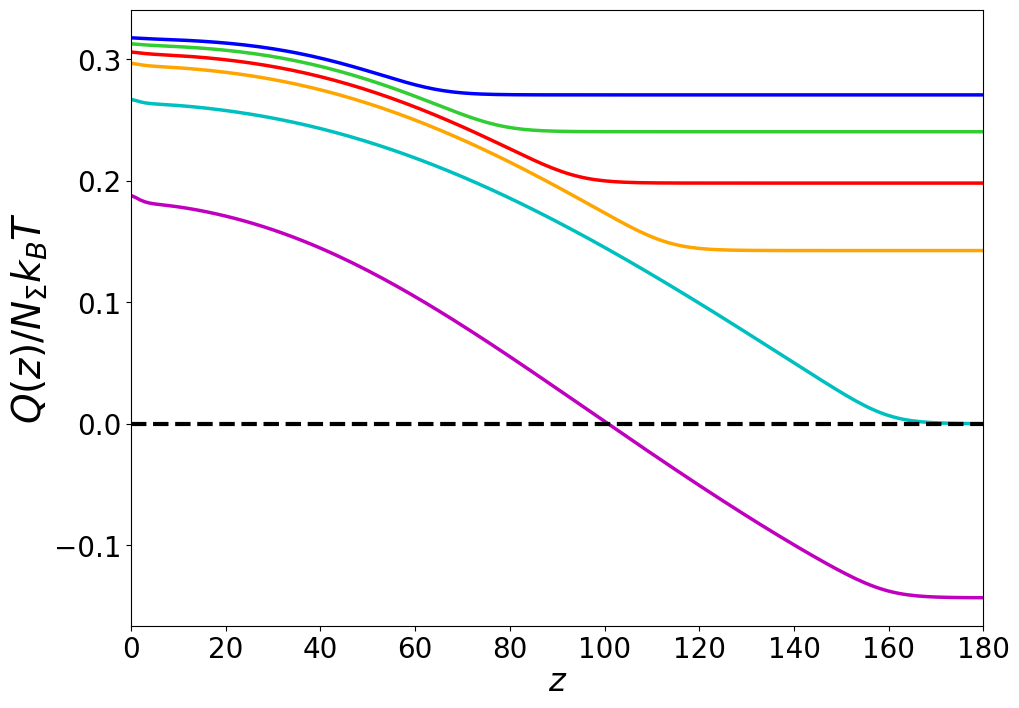

In [10]:
fig, ax = plt.subplots()

for delt_pK, anneal, quen, color in zip(delta_pK_brush, files_anneal_pH, files_quenc_pH, colors):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi, tild_Q  = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = delt_pK, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = anneal, 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/F_lower_pK/')
        
        
        ax.plot(charge_SCF, linestyle = '-',
        linewidth = 2.5, color = color, label = f'$pH_b = {round(pH_b, 4)}, <\\alpha_z = {round(alpha_z_mean, 2)}>, <Q_{{protein}} = {round(tild_Q, 2)}>$')

ax.plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 3, color = 'black')

# ax.legend(title = f'$N = {N} , S = {S}, Cs = {Cs}, pK_{{brush}} = {pK_brush}, pI = {round(pH_iep, 2)}$',
#     fontsize = 14, 
#         ncol = 1, 
#         facecolor = 'white', 
#         edgecolor = 'black', 
#         title_fontsize = '14', 
#         loc = 'lower right')

fig.set_figwidth(11)
fig.set_figheight(8)

ax.set_xlim(0, 180)

# ax.set_ylim(-0.5, -0.2)


ax.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

ax.set_ylabel("$Q(z)/N_\Sigma k_{B}T$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
# save = fig.savefig('Q_lower_pK_SCF.pdf', dpi = 200)

FileNotFoundError: [Errno 2] No such file or directory: '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/report_range_pH/a_pH_0.5.pro'

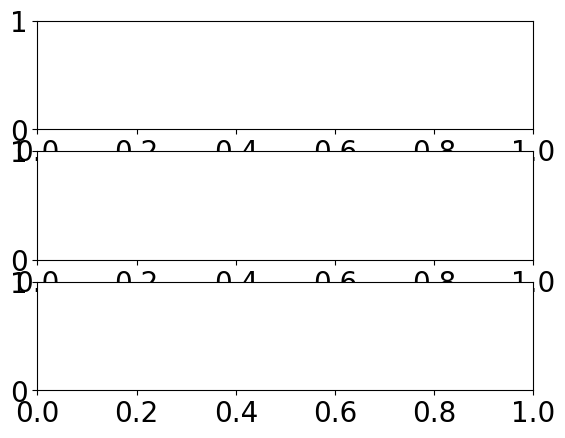

In [11]:
delta_pK_brush = [0.2, -0.2, -0.7]
colors = ['blue', 'orange', 'red', 'purple', 'limegreen', 'pink', 'olive']
files_anneal_pH = ['a_pH_0.5.pro', 'a_pH_0.2.pro', 'a_pH_0.pro', 'annealing_brush_temp.pro']
files_quenc_pH = ['q_pH_0.5.pro', 'q_pH_0.2.pro', 'q_pH_0.pro', 'flat_anion_brush_temp.pro']

fig, axs = plt.subplots(nrows= 3 , ncols= 1 )

for delt_pK, color, file_anneal, quen in zip(delta_pK_brush, colors, files_anneal_pH, files_quenc_pH):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi,  = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = delt_pK, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = file_anneal, 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/report_range_pH/')

        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = alpha_b,
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = quen,
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/report_range_pH/')
                   
        # print(y_exp_q_in.max() - y_exp_q_out.min(), delt_pK)
        # print(pH_sfbox, alpha_z_mean)
        
        axs[0].plot(np.hstack((z_in_range, z_out_range)), np.hstack((f_ion_in, f_ion_out)), linestyle = '-',
        linewidth = 2, color = color, label = f'$pH_b = {pH_b},\delta pH_b = {round(delta_pH_b, 2)}, H = {round(H, 2)}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        axs[0].plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_exp_in, y_exp_out)), linestyle = '--',
        linewidth = 2, color = color, label = f'$quenched, pH_b = {round(pH_b, 4)}$')
        
        axs[1].plot(np.hstack((z_in_range, z_out_range)), np.hstack((charge_in, charge_out)), linestyle = '-',
        linewidth = 2, color = color)
        
        axs[1].plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_exp_q_in, y_exp_q_out)), linestyle = '--',
        linewidth = 2, color = color)
        
        axs[2].plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
        linewidth = 2, color = color, label = f'$<\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        axs[2].plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '--',
        linewidth = 2, color = color)
        
        # axs[0].plot(f_ion_SCF, linestyle = '-',
        # linewidth = 2, color = color, label = f'$\delta pK = {delt_pK},\delta pH_b = {round(delta_pH_b, 2)}, <\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        # axs[0].plot(f_ion_SCF_quen, linestyle = '--',
        # linewidth = 2, color = color, label = f'$quenched, pH_b = {pH_b}$')
        
        # axs[1].plot(charge_SCF, linestyle = '-',
        # linewidth = 2, color = color)
        
        # axs[1].plot(Q_SCF_quen, linestyle = '--',
        # linewidth = 2, color = color)
        
        # axs[2].plot(parse_SCF_psi, linestyle = '-',
        # linewidth = 2, color = color, label = f'$<\\alpha_z> = {round(alpha_z_mean, 2)}$')
        
        # axs[2].plot(parse_SCF_psi_quen, linestyle = '--',
        # linewidth = 2, color = color)
        
axs[0].plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

axs[1].plot(np.hstack((z_in_range, z_out_range)), [0]*len(np.hstack((z_in_range, z_out_range))), linestyle = '--',
        linewidth = 2, color = 'grey')

axs[0].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[1].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[2].set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

axs[0].set_ylabel("$\Delta F_{ion}(z)/N_\Sigma k_{B}T$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)
axs[1].set_ylabel("$Q(z)/N_\Sigma k_{B}T$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs[2].set_ylabel("$\psi(z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

axs[0].legend(title = f'$pK_{{brush}} = {pK_brush}, pI = {round(pH_iep, 2)}, f_+ = {f_plus}, pK_{{+}} = {pK_plus}, pK_{{-}} = {pK_minus}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '12', 
        loc = 'lower right')

axs[1].legend(title = f'$N = {N} , S = {S}, Cs = {Cs}$',
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'upper right')

axs[2].legend(
    fontsize = 14, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'lower right')

fig.set_figwidth(12)
fig.set_figheight(20)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
# axs[0].set_xlim(0, 200)
# axs[1].set_xlim(0, 200)
# axs[2].set_xlim(0, 200)

# save = fig.savefig('наложение_теория_намикс_абсорбция.svg', dpi = 200)

plt.show()


Свободная энергия и заряд для сильной/слабой щетки на плоскости

Электростатический потенциал: теория и SCF

$dpk = 0.1, pH = 1.2589095630617655e-05, alpha = 0.1260117864270558$
$dpk = -0.4, pH = 3.9810558566661404e-06, alpha = 0.25145528459378336$
$dpk = -0.7, pH = 1.9952583339051167e-06, alpha = 0.3591647584139822$


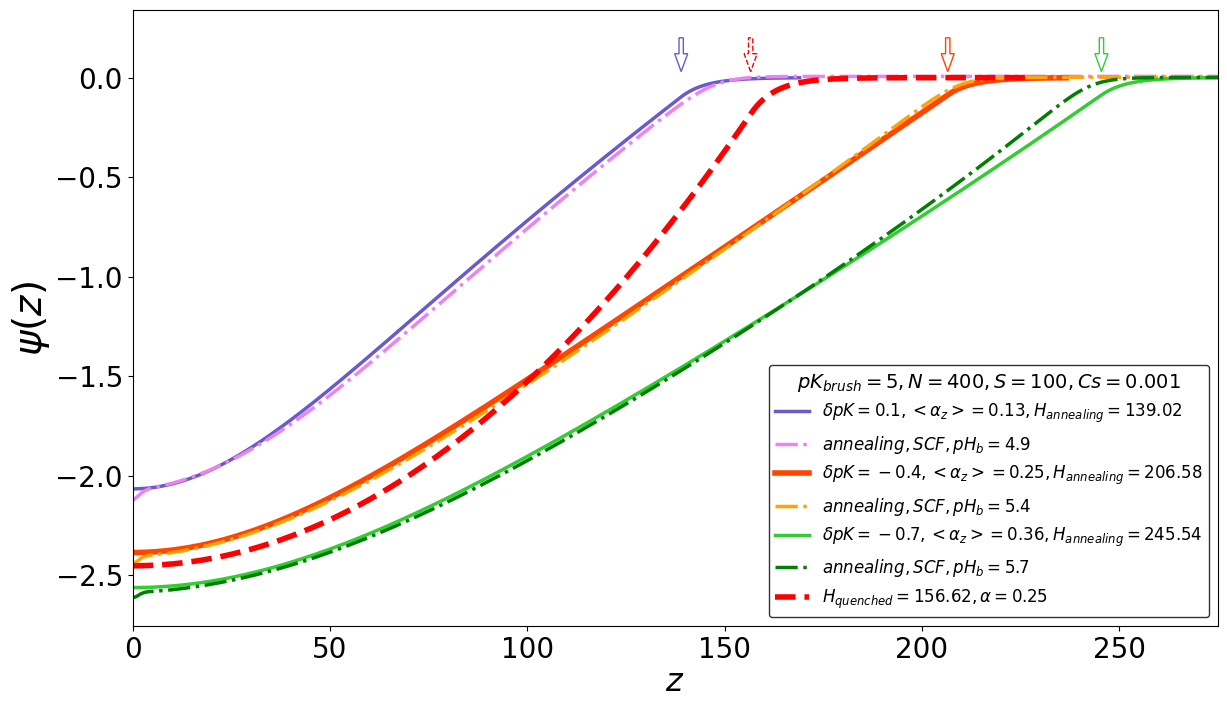

In [ ]:
fig, ax = plt.subplots()

delta_pK_brush = [0.1, -0.4, -0.7]
files_anneal = ['a_dpk_0.1.pro', 'a_dpk_-0.4.pro', 'a_dpk_-0.7.pro']
files_quenched = ['q_dpk_0.1.pro', 'q_dpk_-0.4.pro', 'q_dpk_-0.7.pro']
colors_SCF = ['violet', 'orange', 'green', 'c']
colors = ['slateblue', 'orangered', 'limegreen']
sizelines = [2.5, 4, 2.5]

for delt_pK, f_anneal, f_quen, color_SCF, color, size in zip(delta_pK_brush, files_anneal, files_quenched, colors_SCF, colors, sizelines):
        #СЛАБАЯ ЩЕТКА

        H, alpha_H, tlambda, K, alpha_z_mean,alpha_z,alpha_b, \
            delta_pK, pH_b, pH_iep,pH_sfbox, delta_pH_b, \
            z_in_range, z_out_range,psi_in, psi_out, f_ion_in, f_ion_out, charge_in, charge_out,\
            polymer_dens_anneal, \
            f_ion_SCF, charge_SCF, parse_SCF_psi, parse_SCF_phi, tild_Q  = annealing_anion(
        N = N, 
        S = S,
        Cs = Cs,
        delta_pK = delt_pK, #Отступ от ИЭТ белка
        pK = pK_brush,

        #Параметры белка
        f_plus = f_plus, #доля заряженных групп на поверхности
        pK_plus = pK_plus,
        pK_minus = pK_minus, 
        file_name = f_anneal, 
        way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/report_range_pH/')
        
        print(f'$dpk = {delt_pK}, pH = {pH_sfbox}, alpha = {alpha_z_mean}$')

        #СИЛЬНАЯ ЩЕТКА

        H_q, Lambda, \
        d_pH_b, pH_iep_in_quen, \
        z_in_range_q, z_out_range_q, y_in, y_out, y_exp_in, y_exp_out, y_exp_q_in, y_exp_q_out, \
        f_ion_SCF_quen, Q_SCF_quen, parse_SCF_psi_quen, parse_SCF_phi_quen = quecnhed_br(
        
                N = N, 
                S = S, 
                alpha = 0.25,
                Cs = Cs,
                PK_MINUS = pK_minus,
                PK_PLUS = pK_plus,
                f_plus = f_plus,
                
                pH_B = pH_b,

                file_names = f_quen,
                way = '/home/tpopova/prj/polymer_brush/Free_energy_SCF/SCF_scripts/output/report_range_pH/')
        
        ax.plot(np.hstack((z_in_range, z_out_range)), np.hstack((psi_in, psi_out)), linestyle = '-',
        linewidth = size, color = color, label = f'$\delta pK = {delt_pK}, <\\alpha_z> = {round(alpha_z_mean, 2)}, H_{{annealing}} = {round(H, 2)}$')
        
        ax.plot(parse_SCF_psi, linestyle = '-.',
        linewidth = 2.5, color = color_SCF, label = f'$annealing, SCF, pH_b = {round(pH_b, 2)}$')
        
        ax.arrow(H, 0.2, 0, -0.08,
               width=1.1,
               head_length=0.09,
               edgecolor = color,
               linestyle = '-',
               facecolor = 'white')

ax.arrow(H_q, 0.2, 0, -0.08,
               width=1.1,
               head_length=0.09,
               edgecolor = 'red',
               linestyle = '--',
               facecolor = 'white')
        
        
        # ax.plot(parse_SCF_psi_quen, linestyle = '--',
        # linewidth = 2.5, color = color_SCF, label = f'$quenched, SCF, \\alpha = {round(alpha_z_mean, 2)}$')
        
ax.plot(np.hstack((z_in_range_q, z_out_range_q)), np.hstack((y_in, y_out)), linestyle = '--',
        linewidth = 4, color = 'red', label = f'$ H_{{quenched}} = {round(H_q, 2)}, \\alpha = 0.25$')

ax.set_xlabel('$z$', 
        fontsize = 23,
        color = 'black', 
        labelpad = 2.5)

ax.set_ylabel("$\psi(z)$",
        fontsize = 28,
        color = 'black', 
        labelpad = 2.5)

ax.legend(title = f'$pK_{{brush}} = {pK_brush}, N = {N} , S = {S}, Cs = {Cs}$',
    fontsize = 12, 
        ncol = 1, 
        facecolor = 'white', 
        edgecolor = 'black', 
        title_fontsize = '14', 
        loc = 'lower right')

fig.set_figwidth(14)
fig.set_figheight(8)

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

ax.set_xlim(0, 275)

save = fig.savefig('psi_range_pH_anneal_qune_AT_SCF.pdf', dpi = 200)